# Module 2 - Lesson 3: Intermediate pandas

### Part 1 — Handling Missing Values

In [126]:
import pandas as pd
df = pd.read_csv('employees_with_missing.csv')
df

,employee_id,name,department,salary,years_at_company,age
0,1,Frank,Engineering,95000.0,3.0,28.0
1,2,Sarah,Marketing,72000.0,NaN,26.0
2,3,Jason,NaN,68000.0,4.0,NaN
3,4,Amanda,Engineering,105000.0,6.0,34.0
4,5,Luke,HR,NaN,1.0,24.0
5,6,Emily,Finance,83000.0,5.0,30.0
6,7,Kevin,Engineering,99000.0,4.0,NaN
7,8,Olivia,Sales,64000.0,2.0,25.0
8,9,Daniel,Finance,90000.0,7.0,36.0
9,10,Sophia,Marketing,NaN,3.0,27.0


#### Warm-Up 1 - Detect Missing Values

In [127]:
df.isna() #Presents boolean values inside the dataframe, False means there is a value in that cell, True means missing value is true

,employee_id,name,department,salary,years_at_company,age
0,False,False,False,False,False,False
1,False,False,False,False,True,False
2,False,False,True,False,False,True
3,False,False,False,False,False,False
4,False,False,False,True,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,True
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,True,False,False


In [128]:
df.isna().sum() #sums up total missing values per column

employee_id         0
name                0
department          1
salary              2
years_at_company    1
age                 2
dtype: int64

#### Warm-Up 2 - Remove Missing Values

In [129]:
df.dropna()

,employee_id,name,department,salary,years_at_company,age
0,1,Frank,Engineering,95000.0,3.0,28.0
3,4,Amanda,Engineering,105000.0,6.0,34.0
5,6,Emily,Finance,83000.0,5.0,30.0
7,8,Olivia,Sales,64000.0,2.0,25.0
8,9,Daniel,Finance,90000.0,7.0,36.0


#### Warm-Up 3 - Fill Missing Values

In [130]:
df.salary = df.salary.fillna(value=df.salary.mean())
df

,employee_id,name,department,salary,years_at_company,age
0,1,Frank,Engineering,95000.0,3.0,28.0
1,2,Sarah,Marketing,72000.0,NaN,26.0
2,3,Jason,NaN,68000.0,4.0,NaN
3,4,Amanda,Engineering,105000.0,6.0,34.0
4,5,Luke,HR,84500.0,1.0,24.0
5,6,Emily,Finance,83000.0,5.0,30.0
6,7,Kevin,Engineering,99000.0,4.0,NaN
7,8,Olivia,Sales,64000.0,2.0,25.0
8,9,Daniel,Finance,90000.0,7.0,36.0
9,10,Sophia,Marketing,84500.0,3.0,27.0


In [131]:
df.years_at_company = df.years_at_company.fillna(value=df.years_at_company.mean())
df

,employee_id,name,department,salary,years_at_company,age
0,1,Frank,Engineering,95000.0,3.000000,28.0
1,2,Sarah,Marketing,72000.0,3.888889,26.0
2,3,Jason,NaN,68000.0,4.000000,NaN
3,4,Amanda,Engineering,105000.0,6.000000,34.0
4,5,Luke,HR,84500.0,1.000000,24.0
5,6,Emily,Finance,83000.0,5.000000,30.0
6,7,Kevin,Engineering,99000.0,4.000000,NaN
7,8,Olivia,Sales,64000.0,2.000000,25.0
8,9,Daniel,Finance,90000.0,7.000000,36.0
9,10,Sophia,Marketing,84500.0,3.000000,27.0


In [132]:
df.age = df.age.fillna(value=df.age.mean())
df

,employee_id,name,department,salary,years_at_company,age
0,1,Frank,Engineering,95000.0,3.000000,28.00
1,2,Sarah,Marketing,72000.0,3.888889,26.00
2,3,Jason,NaN,68000.0,4.000000,28.75
3,4,Amanda,Engineering,105000.0,6.000000,34.00
4,5,Luke,HR,84500.0,1.000000,24.00
5,6,Emily,Finance,83000.0,5.000000,30.00
6,7,Kevin,Engineering,99000.0,4.000000,28.75
7,8,Olivia,Sales,64000.0,2.000000,25.00
8,9,Daniel,Finance,90000.0,7.000000,36.00
9,10,Sophia,Marketing,84500.0,3.000000,27.00


In [133]:
df.department = df.department.fillna(value = 'Unknown')
df

,employee_id,name,department,salary,years_at_company,age
0,1,Frank,Engineering,95000.0,3.000000,28.00
1,2,Sarah,Marketing,72000.0,3.888889,26.00
2,3,Jason,Unknown,68000.0,4.000000,28.75
3,4,Amanda,Engineering,105000.0,6.000000,34.00
4,5,Luke,HR,84500.0,1.000000,24.00
5,6,Emily,Finance,83000.0,5.000000,30.00
6,7,Kevin,Engineering,99000.0,4.000000,28.75
7,8,Olivia,Sales,64000.0,2.000000,25.00
8,9,Daniel,Finance,90000.0,7.000000,36.00
9,10,Sophia,Marketing,84500.0,3.000000,27.00


### Part 2 — GroupBy

#### Warm-Up 1 - Average Salary by Department

In [134]:
df.groupby('department')['salary'].mean()

department
Engineering    99666.666667
Finance        86500.000000
HR             84500.000000
Marketing      78250.000000
Sales          64000.000000
Unknown        68000.000000
Name: salary, dtype: float64

#### Warm-Up 2 -Total Employees by Department

In [135]:
df.groupby('department')['name'].count()

department
Engineering    3
Finance        2
HR             1
Marketing      2
Sales          1
Unknown        1
Name: name, dtype: int64

#### Warm-Up 3 - Multiple Aggregations

In [136]:
df.groupby('department').agg({
    'salary' : ['mean','max'],
    'name' : 'count',
    'years_at_company' : 'mean'
})

salary            name years_at_company
                     mean       max count             mean
department                                                
Engineering  99666.666667  105000.0     3         4.333333
Finance      86500.000000   90000.0     2         6.000000
HR           84500.000000   84500.0     1         1.000000
Marketing    78250.000000   84500.0     2         3.444444
Sales        64000.000000   64000.0     1         2.000000
Unknown      68000.000000   68000.0     1         4.000000

#### Warm-Up 4 - GroupBy on Multiple Columns

In [137]:
df.groupby(['department','age'])['salary'].mean()

department   age  
Engineering  28.00     95000.0
             28.75     99000.0
             34.00    105000.0
Finance      30.00     83000.0
             36.00     90000.0
HR           24.00     84500.0
Marketing    26.00     72000.0
             27.00     84500.0
Sales        25.00     64000.0
Unknown      28.75     68000.0
Name: salary, dtype: float64

### Part 3 - Merging DataFrames

In [138]:
df1 = pd.read_csv('employees_with_missing.csv')
df2 = pd.read_csv('employee_details.csv')

#### Warm-Up 1 - Basic Inner Merge

In [139]:
pd.merge(df1, df2, on='employee_id',how='inner')

,employee_id,name,department,salary,years_at_company,age,position,experience_level
0,1,Frank,Engineering,95000.0,3.0,28.0,Engineer,Senior
1,2,Sarah,Marketing,72000.0,NaN,26.0,Marketing Associate,Junior
2,3,Jason,NaN,68000.0,4.0,NaN,Sales Rep,Mid
3,4,Amanda,Engineering,105000.0,6.0,34.0,Engineer,Senior
4,5,Luke,HR,NaN,1.0,24.0,HR Coordinator,Junior
5,6,Emily,Finance,83000.0,5.0,30.0,Financial Analyst,Mid
6,7,Kevin,Engineering,99000.0,4.0,NaN,Engineer,Mid
7,8,Olivia,Sales,64000.0,2.0,25.0,Sales Associate,Junior
8,9,Daniel,Finance,90000.0,7.0,36.0,Financial Analyst,Senior
9,10,Sophia,Marketing,NaN,3.0,27.0,Marketing Specialist,Mid


#### Warm-Up 2 - Left Merge

In [140]:
pd.merge(df1, df2, on='employee_id',how='left')

,employee_id,name,department,salary,years_at_company,age,position,experience_level
0,1,Frank,Engineering,95000.0,3.0,28.0,Engineer,Senior
1,2,Sarah,Marketing,72000.0,NaN,26.0,Marketing Associate,Junior
2,3,Jason,NaN,68000.0,4.0,NaN,Sales Rep,Mid
3,4,Amanda,Engineering,105000.0,6.0,34.0,Engineer,Senior
4,5,Luke,HR,NaN,1.0,24.0,HR Coordinator,Junior
5,6,Emily,Finance,83000.0,5.0,30.0,Financial Analyst,Mid
6,7,Kevin,Engineering,99000.0,4.0,NaN,Engineer,Mid
7,8,Olivia,Sales,64000.0,2.0,25.0,Sales Associate,Junior
8,9,Daniel,Finance,90000.0,7.0,36.0,Financial Analyst,Senior
9,10,Sophia,Marketing,NaN,3.0,27.0,Marketing Specialist,Mid


#### Warm-Up 3 - Outer Merge

In [141]:
pd.merge(df1, df2, on='employee_id',how='outer')

,employee_id,name,department,salary,years_at_company,age,position,experience_level
0,1,Frank,Engineering,95000.0,3.0,28.0,Engineer,Senior
1,2,Sarah,Marketing,72000.0,NaN,26.0,Marketing Associate,Junior
2,3,Jason,NaN,68000.0,4.0,NaN,Sales Rep,Mid
3,4,Amanda,Engineering,105000.0,6.0,34.0,Engineer,Senior
4,5,Luke,HR,NaN,1.0,24.0,HR Coordinator,Junior
5,6,Emily,Finance,83000.0,5.0,30.0,Financial Analyst,Mid
6,7,Kevin,Engineering,99000.0,4.0,NaN,Engineer,Mid
7,8,Olivia,Sales,64000.0,2.0,25.0,Sales Associate,Junior
8,9,Daniel,Finance,90000.0,7.0,36.0,Financial Analyst,Senior
9,10,Sophia,Marketing,NaN,3.0,27.0,Marketing Specialist,Mid


#### Warm-Up 4 - Detect Merge Conflicts

In [142]:
merged_df = pd.merge(df1, df2, on='employee_id',how='outer')
merged_df

,employee_id,name,department,salary,years_at_company,age,position,experience_level
0,1,Frank,Engineering,95000.0,3.0,28.0,Engineer,Senior
1,2,Sarah,Marketing,72000.0,NaN,26.0,Marketing Associate,Junior
2,3,Jason,NaN,68000.0,4.0,NaN,Sales Rep,Mid
3,4,Amanda,Engineering,105000.0,6.0,34.0,Engineer,Senior
4,5,Luke,HR,NaN,1.0,24.0,HR Coordinator,Junior
5,6,Emily,Finance,83000.0,5.0,30.0,Financial Analyst,Mid
6,7,Kevin,Engineering,99000.0,4.0,NaN,Engineer,Mid
7,8,Olivia,Sales,64000.0,2.0,25.0,Sales Associate,Junior
8,9,Daniel,Finance,90000.0,7.0,36.0,Financial Analyst,Senior
9,10,Sophia,Marketing,NaN,3.0,27.0,Marketing Specialist,Mid


In [143]:
merged_df.loc[merged_df.isna().any(axis=1)]

,employee_id,name,department,salary,years_at_company,age,position,experience_level
1,2,Sarah,Marketing,72000.0,NaN,26.0,Marketing Associate,Junior
2,3,Jason,NaN,68000.0,4.0,NaN,Sales Rep,Mid
4,5,Luke,HR,NaN,1.0,24.0,HR Coordinator,Junior
6,7,Kevin,Engineering,99000.0,4.0,NaN,Engineer,Mid
9,10,Sophia,Marketing,NaN,3.0,27.0,Marketing Specialist,Mid


### Part 4 - Basic Visualizations

In [144]:
import matplotlib.pyplot as plt

#### Warm-up 1: Histogram

Text(0.5, 1.0, 'Salary Distribution')

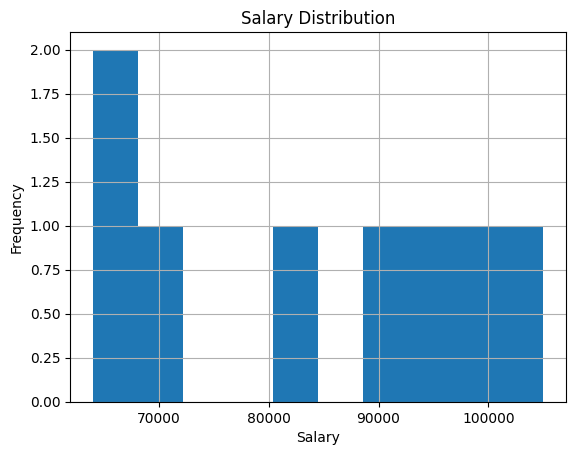

In [145]:
df1['salary'].hist(bins=10)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')

#### Warm-up 2: Bar Chart

Text(0.5, 1.0, 'Total Employees by Department')

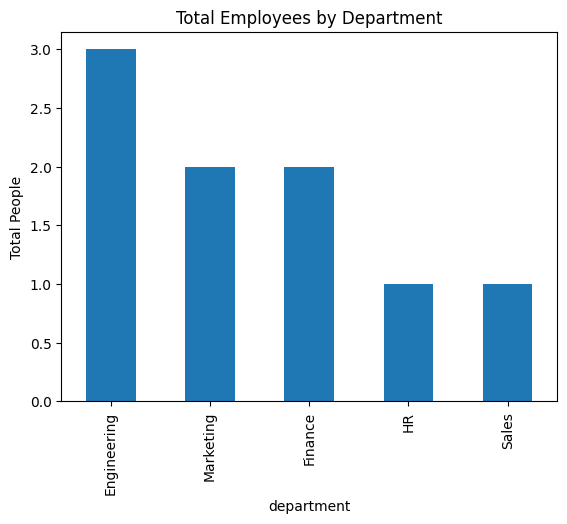

In [146]:
df1['department'].value_counts().plot(kind='bar')
plt.ylabel('Total People')
plt.title('Total Employees by Department')

#### Warm-up 3: Line Plot

Text(0.5, 1.0, 'Employee Ages (Youngest to Oldest)')

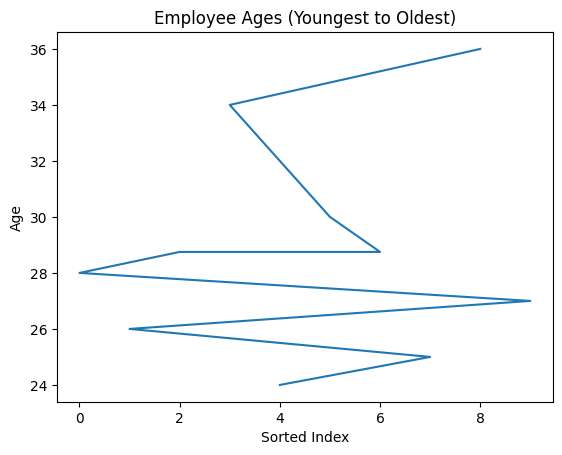

In [154]:
df['age'].sort_values().plot(kind='line')
plt.xlabel("Sorted Index")
plt.ylabel("Age")
plt.title("Employee Ages (Youngest to Oldest)")

In [155]:
df

,employee_id,name,department,salary,years_at_company,age
0,1,Frank,Engineering,95000.0,3.000000,28.00
1,2,Sarah,Marketing,72000.0,3.888889,26.00
2,3,Jason,Unknown,68000.0,4.000000,28.75
3,4,Amanda,Engineering,105000.0,6.000000,34.00
4,5,Luke,HR,84500.0,1.000000,24.00
5,6,Emily,Finance,83000.0,5.000000,30.00
6,7,Kevin,Engineering,99000.0,4.000000,28.75
7,8,Olivia,Sales,64000.0,2.000000,25.00
8,9,Daniel,Finance,90000.0,7.000000,36.00
9,10,Sophia,Marketing,84500.0,3.000000,27.00


#### Warm-up 4: Scatter Plot

Text(0, 0.5, 'Salary')

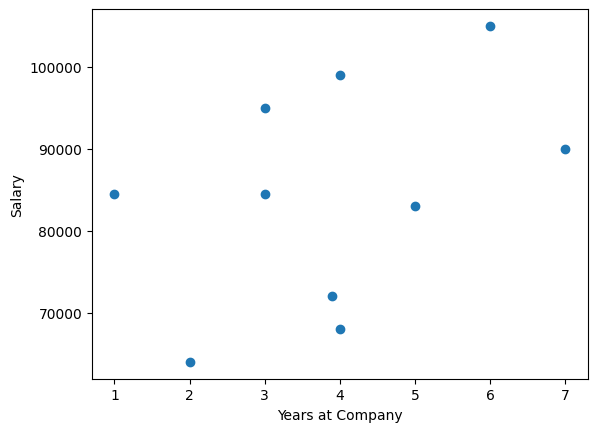

In [157]:
plt.scatter(df['years_at_company'],df['salary'])
plt.xlabel('Years at Company')
plt.ylabel('Salary')

## Part 5 - Mini Project: Data Explorer (v1)

### Basic Dataset Summary

In [190]:
df = pd.read_csv('retail_sales.csv')
df.head() #Displays first 5 rows
df.info() #Gives us rows and columns
df.columns #Print column names
df.dtypes #Gives us data types
df.isnull().sum() #Gives us sum of missing values per column
df.describe() # Gives us statistical data for the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        17 non-null     int64  
 1   date            17 non-null     object 
 2   customer_id     17 non-null     int64  
 3   product         17 non-null     object 
 4   category        17 non-null     object 
 5   quantity        17 non-null     int64  
 6   unit_price      17 non-null     float64
 7   total_price     17 non-null     float64
 8   payment_method  15 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.3+ KB


,order_id,customer_id,quantity,unit_price,total_price
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1009.000000,505.176471,2.176471,50.357059,59.578235
std,5.049752,3.377042,2.297697,45.617495,40.057052
min,1001.000000,501.000000,1.000000,1.200000,6.990000
25%,1005.000000,502.000000,1.000000,15.000000,30.000000
50%,1009.000000,505.000000,1.000000,25.990000,51.980000
75%,1013.000000,508.000000,2.000000,79.990000,79.990000
max,1017.000000,511.000000,10.000000,149.990000,149.990000


### Categorical Summary

In [245]:
df[['product','category','payment_method']].nunique() # Prints the number of unique values for each categorical column
df[['product','category','payment_method']].mode(dropna=True) # Prints the most frequent value for every categorical column
df[['product','category','payment_method']].apply(pd.value_counts) #Prints a frequency distribution for these categories

/var/folders/7c/fj0x20fs7xg_3605d3_k_5b40000gn/T/ipykernel_39872/3872738996.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df[['product','category','payment_method']].apply(pd.value_counts)
/var/folders/7c/fj0x20fs7xg_3605d3_k_5b40000gn/T/ipykernel_39872/3872738996.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df[['product','category','payment_method']].apply(pd.value_counts)
/var/folders/7c/fj0x20fs7xg_3605d3_k_5b40000gn/T/ipykernel_39872/3872738996.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df[['product','category','payment_method']].apply(pd.value_counts)


,product,category,payment_method
Baseball Cap,1.0,NaN,NaN
Blender,2.0,NaN,NaN
Cash,NaN,NaN,2.0
Clothing,NaN,1.0,NaN
Coffee Maker,1.0,NaN,NaN
Credit Card,NaN,NaN,8.0
Debit Card,NaN,NaN,2.0
Desk Chair,1.0,NaN,NaN
Desk Lamp,1.0,NaN,NaN
Electronics,NaN,5.0,NaN


### GroupBy Summary

In [278]:
df.groupby('category')['total_price'].sum() #Total revenue generated by category
df.groupby('product')['quantity'].sum() #Total quantity sold by product
df.groupby('payment_method').total_price.mean() #Average order value by payment method
df.groupby('customer_id').order_id.count() #Amount of orders per customer

customer_id
501    3
502    2
503    2
504    1
505    1
506    2
507    1
508    1
509    2
510    1
511    1
Name: order_id, dtype: int64

### Visualizations

Text(0, 0.5, 'Total Revenue Generated')

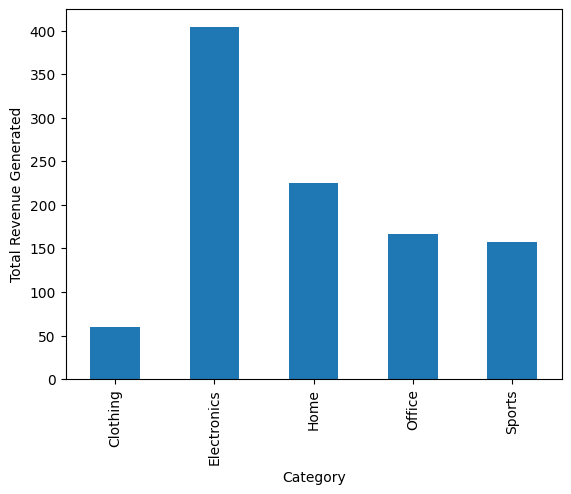

In [282]:
#Bar Chart Demonstrating Total Revenue Generated by Category
df.groupby('category')['total_price'].sum().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Revenue Generated')

Text(0, 0.5, 'Total People')

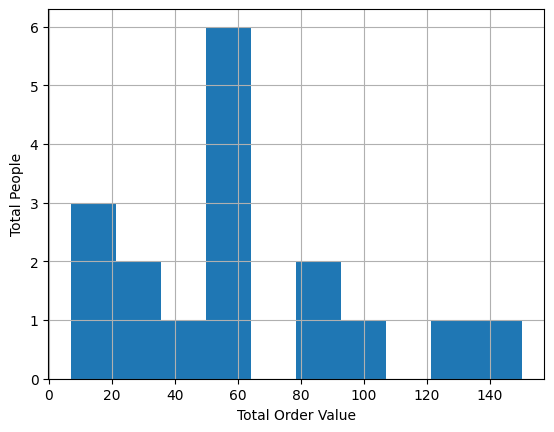

In [288]:
#Histogram of Total Order Values
df.total_price.hist()
plt.xlabel('Total Order Value')
plt.ylabel('Total People')

<Axes: xlabel='total_price', ylabel='quantity'>

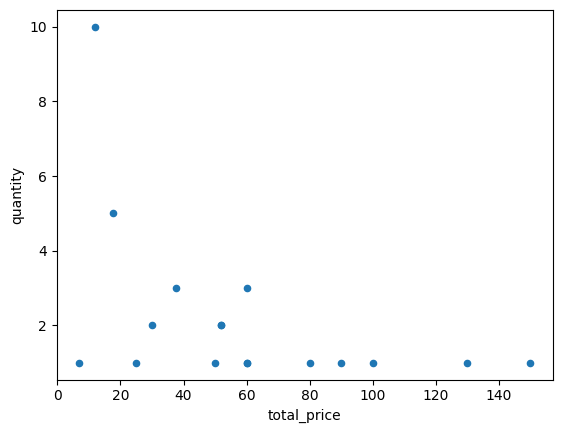

In [291]:
#Scatter Plot: Quantity vs. Total Price
df.plot.scatter('total_price','quantity')

### Insights

#### 1. Electronics generated a significant amount of revenue, as shown by the category versus total price bar chart
#### 2. Credit card is the most popular method of purpose by a lot, as shown in the categorical summary
#### 3. Debit Card payments usually have the highest order values, as shown by the groupby summary 
#### 4. Customers 501, 502, 503, 506 and 509 are repeat customers this week and should be rewarded with discount coupons